In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#importing dataset
data = pd.read_csv("C:/Users/Keo/Downloads/staff_survey.csv")
data.head()

,current_satisfaction_level,previous_satisfaction_level,number_of_projects,average_montly_hours,time_spend_at_company,work_accident,left_company,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Inspecting/understanding dataset

In [4]:
print(data.columns)

Index(['current_satisfaction_level', 'previous_satisfaction_level',
       'number_of_projects', 'average_montly_hours', 'time_spend_at_company',
       'work_accident', 'left_company', 'promotion_last_5years', 'department',
       'salary'],
      dtype='object')


In [5]:
data.describe()

,current_satisfaction_level,previous_satisfaction_level,number_of_projects,average_montly_hours,time_spend_at_company,work_accident,left_company,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data.shape

(14999, 10)

In [7]:
data.isnull().sum()

current_satisfaction_level     0
previous_satisfaction_level    0
number_of_projects             0
average_montly_hours           0
time_spend_at_company          0
work_accident                  0
left_company                   0
promotion_last_5years          0
department                     0
salary                         0
dtype: int64

In [8]:
data.corr(method="pearson")

,current_satisfaction_level,previous_satisfaction_level,number_of_projects,average_montly_hours,time_spend_at_company,work_accident,left_company,promotion_last_5years
current_satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
previous_satisfaction_level,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_of_projects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_at_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left_company,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


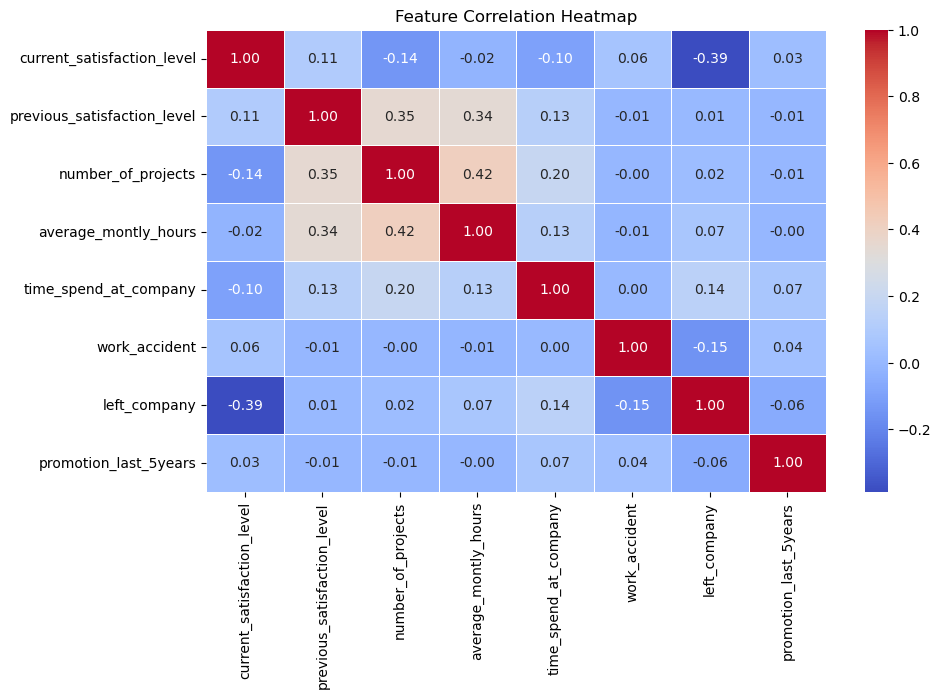

In [9]:
corr_matrix = data.corr(method="pearson")

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
#Removing department and salary columns 
data.drop(columns=['department', 'salary'], inplace=True)
print(data.columns)

Index(['current_satisfaction_level', 'previous_satisfaction_level',
       'number_of_projects', 'average_montly_hours', 'time_spend_at_company',
       'work_accident', 'left_company', 'promotion_last_5years'],
      dtype='object')


In [11]:
#feature matrix
X = data.drop(columns=["left_company"])
Y = data["left_company"]

In [12]:
#standard scalling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

print(X_pca.shape)

(14999, 2)


In [14]:
def PCA(X, num_components):
    X_meaned = X - np.mean(X, axis=0)
    cov_mat = np.cov(X_meaned, rowvar=False)
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    
    eigenvector_subset = sorted_eigenvectors[:, :num_components]
    X_reduced = np.dot(X_meaned, eigenvector_subset)
    
    return X_reduced, eigen_values[sorted_index][:num_components], eigenvector_subset, cov_mat

In [15]:
X_pca_numpy, eigenvalues, top_eigenvectors, cov_mat = PCA(X_scaled, 2)

In [16]:
principal_df = pd.DataFrame(X_pca_numpy, columns=['PC1', 'PC2'])
principal_df['target'] = Y

C:\Users\Keo\AppData\Local\Temp\ipykernel_5088\1561204176.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axis2.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', alpha=0.8, edgecolors='k', marker='x')


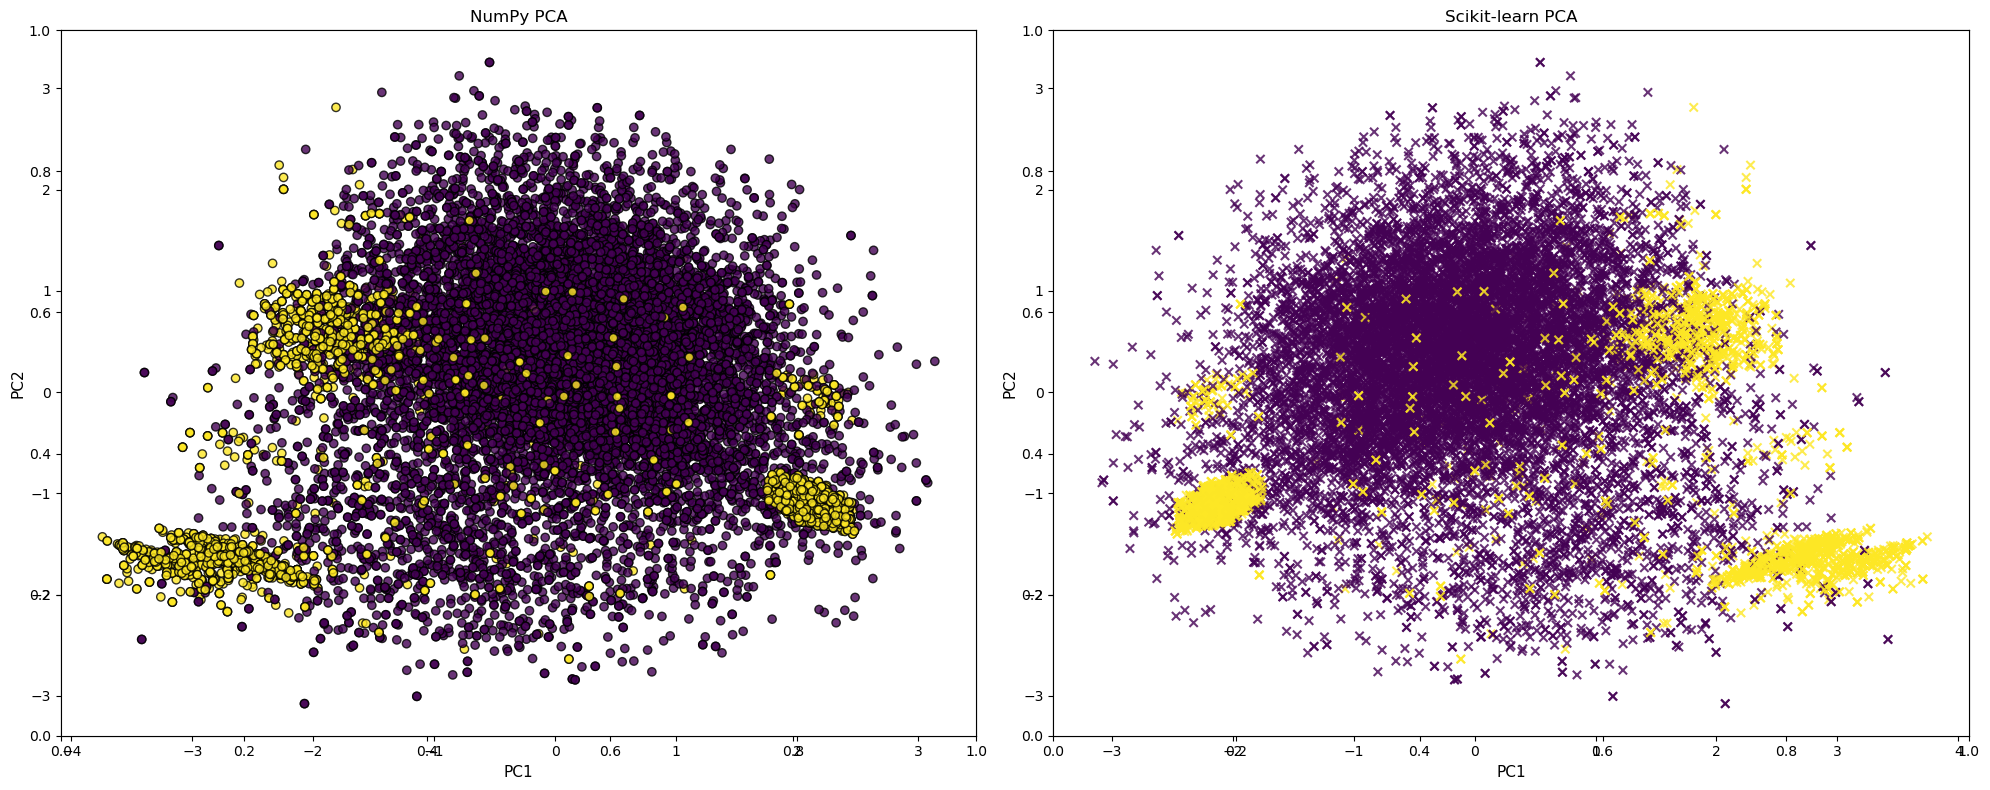

In [17]:
# Comparison plot
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First plot for NumPy PCA
axis1 = fig.add_subplot(121)
axis1.scatter(X_pca_numpy[:, 0], X_pca_numpy[:, 1], c=Y, cmap='viridis', alpha=0.8, edgecolors='k')
axis1.set_xlabel("PC1", fontsize=11)
axis1.set_ylabel("PC2", fontsize=11)
axis1.set_title("NumPy PCA")

# Second plot for Scikit-learn PCA
axis2 = fig.add_subplot(122)
axis2.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', alpha=0.8, edgecolors='k', marker='x')
axis2.set_xlabel("PC1", fontsize=11)
axis2.set_ylabel("PC2", fontsize=11)
axis2.set_title("Scikit-learn PCA")

plt.tight_layout()
plt.show()

In [18]:
print("\nEigenvalues Comparison:")
print("NumPy PCA:", eigenvalues[:2])
print("Scikit-learn PCA:", pca.explained_variance_)


Eigenvalues Comparison:
NumPy PCA: [1.83017431 1.12659606]
Scikit-learn PCA: [1.83017431 1.12659606]


In [19]:
print("\nEigenvectors Comparison:")
print("NumPy PCA:\n", top_eigenvectors)
print("Scikit-learn PCA:\n", pca.components_.T)


Eigenvectors Comparison:
NumPy PCA:
 [[ 0.08797699  0.79752505]
 [-0.50695734  0.33180877]
 [-0.5788351  -0.10338032]
 [-0.54901653  0.10388959]
 [-0.31354922 -0.28404472]
 [ 0.01930249  0.37489883]
 [-0.00996933  0.10557298]]
Scikit-learn PCA:
 [[-0.08797699  0.79752505]
 [ 0.50695734  0.33180877]
 [ 0.5788351  -0.10338032]
 [ 0.54901653  0.10388959]
 [ 0.31354922 -0.28404472]
 [-0.01930249  0.37489883]
 [ 0.00996933  0.10557298]]


In [20]:
#covariance matrix comparison
print("\nNumPy PCA Covariance Matrix:\n", cov_mat)

cov_sklearn = np.cov(X_scaled.T)
print("\nSklearn Covariance Matrix:\n", cov_sklearn)


NumPy PCA Covariance Matrix:
 [[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]

Sklearn Covariance Matrix:
 [[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668